- Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [4]:
#Importing .csv file
data = pd.read_csv(r'C:\Users\GOKUL BABU K\Downloads\Sales_data_zone_wise.csv')

In [6]:
# Checking the data imported properly
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [7]:
#Checking for the null values
data.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

- Null values are not present the data

In [8]:
#Finding the overview of the data
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


# 1. The mean sales generated by each zone.

In [10]:
#Taking the column names
data.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

In [16]:
#Finding the mean
mean_zoneA = data['Zone - A'].mean()
mean_zoneB = data['Zone - B'].mean()
mean_zoneC = data['Zone - C'].mean()
mean_zoneD = data['Zone - D'].mean()

In [17]:
print("Mean of Zone A =",mean_zoneA)
print("Mean of Zone B =",mean_zoneB)
print("Mean of Zone C =",mean_zoneC)
print("Mean of Zone D =",mean_zoneD)

Mean of Zone A = 1540493.1379310344
Mean of Zone B = 1755559.5862068965
Mean of Zone C = 1772871.0344827587
Mean of Zone D = 1842926.7586206896


# 2. Total sales generated by all the zones for each month.

In [25]:
#Finding columnwise sum
sales_sum = data.sum(axis = 1)

In [26]:
print(sales_sum)

0     7022544
1     7152303
2     6475939
3     8174449
4     5995328
5     7151387
6     7287108
7     7816299
8     6703395
9     7128210
10    7032783
11    6111084
12    5925424
13    7155515
14    5934156
15    6506659
16    7149383
17    7083490
18    6971953
19    7124599
20    7389597
21    7560001
22    6687919
23    7784747
24    6095918
25    6512360
26    6267918
27    7470920
28    6772277
dtype: int64


In [36]:
#Adding sum colum to existing data
data["Sales Sum"] = sales_sum

In [37]:
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Sales Sum
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


Text(0, 0.5, 'Total sales')

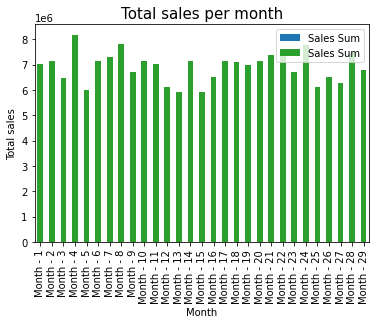

In [43]:
#Plotting the sum for better visualisation
ax = data.plot(x="Month", y="Sales Sum", kind="bar")
data.plot(x="Month", y="Sales Sum", kind="bar", ax=ax, color="C2")
plt.title('Total sales per month',size=15)
plt.ylabel("Total sales",fontsize=10)

# 3. Check whether all the zones generate the same amount of sales.

- H0 (null hypothesis): Mean sales of each location is same
- H1 (null hypothesis): Mean sales of each location is different

In [44]:
f_oneway(data['Zone - A'], data['Zone - B'], data['Zone - C'], data['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

- Insight : As the pvalue is less than our 0.05(Confidance interval), we can reject the null hypothesis. Which indicates that the mean sales of each location is different.